In [1]:
import numpy as np

In [2]:
n_data=10
permut_vec=np.random.permutation(n_data)
print (permut_vec) #Random permutation vector of first 500 numbers

[8 5 9 0 2 3 1 4 7 6]


In [3]:
#Taking 30% of Data for Test-data:

n_test=int(n_data*0.3)

test_indices=permut_vec[:n_test] #

print(test_indices)

[8 5 9]


In [4]:
print (permut_vec[3:])

[0 2 3 1 4 7 6]


In [5]:
permut_vec[:5]

array([8, 5, 9, 0, 2])

In [6]:
# Loading Data

import os
import tarfile
from six.moves import urllib
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
HOUSING_PATH = "datasets/housing"
HOUSING_URL = DOWNLOAD_ROOT + HOUSING_PATH + "/housing.tgz"
def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

import pandas as pd
def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)


fetch_housing_data()


#DELTA FILE:
#------------------------------#
housing = load_housing_data()  #
#------------------------------#

In [7]:
import hashlib

def test_set_check(identifier, test_ratio, hash):
    return hash(np.int64(identifier)).digest()[-1] < 256 * test_ratio

def split_train_test_by_id(data, test_ratio, id_column, hash=hashlib.md5):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio, hash))
    #print(in_test_set)
    return data.loc[~in_test_set], data.loc[in_test_set]

In [8]:
#Some info about hashlib

m = hashlib.md5()
m.update(b"Nobody inspects")
m.digest() #Hash codification of "Nobody inspects" according to md5 hash-coding.


b'>\xf7)\xcc\xf0\xccV\x07\x9c\xa5F\xd5\x80\x83\xdc\x12'

In [9]:
m = hashlib.md5()
m.update(b"Nobody inspects")
print(m.digest()[-1]) #print last byte of hash element m ('x12' in decimal notation)
                      #It hashes the string 'Nobody insepects' with md5 hast protocol

18


In [10]:
#Something about "apply" method in Pandas

#defining a function:
def sumless5(x):
    return x-5    

df = pd.DataFrame([4,5,5,2,6,0])
df

,0
0,4
1,5
2,5
3,2
4,6
5,0


In [11]:
#lambda is a way to define short functions within methods and functions..
df_function=df.apply(sumless5, axis=1)
df_lambda=df.apply(lambda x: x*2, axis=1) 
df_bolean=df.apply(lambda y: y>5)

print("Function")
print(df_function)
print("Lambda")
print (df_lambda)
print("Boolean")
print(df_bolean)

Function
   0
0 -1
1  0
2  0
3 -3
4  1
5 -5
Lambda
    0
0   8
1  10
2  10
3   4
4  12
5   0
Boolean
       0
0  False
1  False
2  False
3  False
4   True
5  False


In [12]:
1>5

False

In [13]:
#Loc function in a Panda Data-frame

df_id=df.reset_index() #adding index column to df 

df_id_bolean=df_id["index"].apply(lambda x: x>1) #applying lambda function to index column

print("df_id:")
print(df_id)

print("  ")

print("df_id_index-bolean:")
print(df_id_bolean)



df_id:
   index  0
0      0  4
1      1  5
2      2  5
3      3  2
4      4  6
5      5  0
  
df_id_index-bolean:
0    False
1    False
2     True
3     True
4     True
5     True
Name: index, dtype: bool


In [14]:
df_id.loc[df_id_bolean] #My new df is only filled with index TRUE values according to lambda function

,index,0
2,2,5
3,3,2
4,4,6
5,5,0


In [15]:
#How the test-set_check function works?

index_i=np.int64(20622) #20622 is an index took randomly
m=hashlib.md5(index_i) #Coded into md5 hash-codification
m.digest()[-1]  #Print last byte of index_i (decimal notation) 
test_ratio=0.2  #Determining ratio for test_data
testgood=256*test_ratio 

print("By manual method: ")
print(m.digest()[-1]<testgood)

print("   ")

print("By the t-s_c function method: ")
print(test_set_check(index_i, test_ratio=0.2, hash=hashlib.md5))


By manual method: 
False
   
By the t-s_c function method: 
False


In [16]:
#Let's work with our Housing Data

housing_with_id = housing.reset_index() # adds an `index` column
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "index")

In [17]:
#Stratified splitting

#Creating strate category

housing["income_cat"] = np.ceil(housing["median_income"] / 1.5) #****Note: Study the np.ceil function!
housing["income_cat"].where(housing["income_cat"] < 5, 5.0, inplace=True) #5-Strates


In [18]:
#Stratified_Split_Method, from sklearn library

from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

## Discover and Visualize the Data to Gain Insights

In [19]:
housing = strat_train_set.copy()

#My copy for playing. Remember, housing represents a Panda's Data Frame object

In [20]:
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,286600.0,<1H OCEAN,2.0
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,340600.0,<1H OCEAN,5.0
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,196900.0,NEAR OCEAN,2.0
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,46300.0,INLAND,2.0
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,254500.0,<1H OCEAN,3.0
19480,-120.97,37.66,24.0,2930.0,588.0,1448.0,570.0,3.5395,127900.0,INLAND,3.0
8879,-118.50,34.04,52.0,2233.0,317.0,769.0,277.0,8.3839,500001.0,<1H OCEAN,5.0
13685,-117.24,34.15,26.0,2041.0,293.0,936.0,375.0,6.0000,140200.0,INLAND,4.0
4937,-118.26,33.99,47.0,1865.0,465.0,1916.0,438.0,1.8242,95000.0,<1H OCEAN,2.0
4861,-118.28,34.02,29.0,515.0,229.0,2690.0,217.0,0.4999,500001.0,<1H OCEAN,1.0


### Visualizing Geographical Data

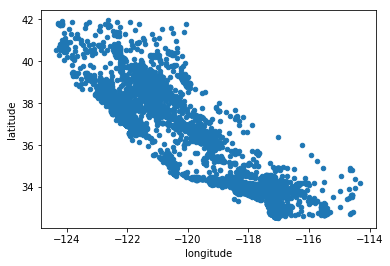

In [21]:
%matplotlib inline
housing.plot(kind="scatter", x="longitude", y="latitude")

#### Exploring the DataFrame.plot method

DataFrame.plot(x=None, y=None, kind='line', ax=None, subplots=False, sharex=None, sharey=False, layout=None, figsize=None, use_index=True, title=None, grid=None, legend=True, style=None, logx=False, logy=False, loglog=False, xticks=None, yticks=None, xlim=None, ylim=None, rot=None, fontsize=None, colormap=None, table=False, yerr=None, xerr=None, secondary_y=False, sort_columns=False, **kwds)

Parameters:	
data : DataFrame
x : label or position, default None
y : label, position or list of label, positions, default None

Allows plotting of one column versus another

kind : str

‘line’ : line plot (default)

‘bar’ : vertical bar plot

‘barh’ : horizontal bar plot

‘hist’ : histogram

‘box’ : boxplot

‘kde’ : Kernel Density Estimation plot

‘density’ : same as ‘kde’

‘area’ : area plot

‘pie’ : pie plot

‘scatter’ : scatter plot

‘hexbin’ : hexbin plot



Explore the parameters in https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html

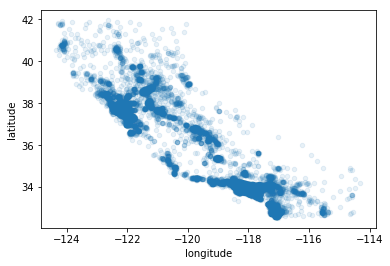

In [22]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)


# alpha:scalar or array_like, optional
#       The size of each point. Possible values are:
#        .A single scalar so all points have the same size
#        .A sequence of scalars, which will be used for each point’s size recursively. For instance, when passing [2,14] all points size will be either 2 or 14, alternatively.

In [23]:
import matplotlib.pyplot as plt

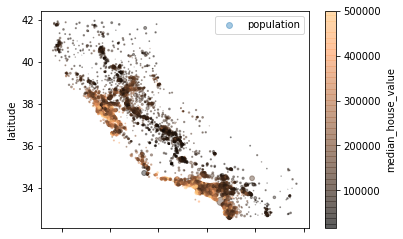

In [24]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
s=housing["population"]/500, label="population", #Population radio circles decreases with denominator (500)
c="median_house_value", cmap=plt.get_cmap("copper"), colorbar=True,
)

### cmaps = 
        [('Perceptually Uniform Sequential', [
            'viridis', 'plasma', 'inferno', 'magma', 'cividis']),
         ('Sequential', [
            'Greys', 'Purples', 'Blues', 'Greens', 'Oranges', 'Reds',
            'YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu', 'BuPu',
            'GnBu', 'PuBu', 'YlGnBu', 'PuBuGn', 'BuGn', 'YlGn']),
         ('Sequential (2)', [
            'binary', 'gist_yarg', 'gist_gray', 'gray', 'bone', 'pink',
            'spring', 'summer', 'autumn', 'winter', 'cool', 'Wistia',
            'hot', 'afmhot', 'gist_heat', 'copper']),
         ('Diverging', [
            'PiYG', 'PRGn', 'BrBG', 'PuOr', 'RdGy', 'RdBu',
            'RdYlBu', 'RdYlGn', 'Spectral', 'coolwarm', 'bwr', 'seismic']),
         ('Cyclic', ['twilight', 'twilight_shifted', 'hsv']),
         ('Qualitative', [
            'Pastel1', 'Pastel2', 'Paired', 'Accent',
            'Dark2', 'Set1', 'Set2', 'Set3',
            'tab10', 'tab20', 'tab20b', 'tab20c']),
         ('Miscellaneous', [
            'flag', 'prism', 'ocean', 'gist_earth', 'terrain', 'gist_stern',
            'gnuplot', 'gnuplot2', 'CMRmap', 'cubehelix', 'brg',
            'gist_rainbow', 'rainbow', 'jet', 'nipy_spectral', 'gist_ncar'])]


In [25]:
corr_matrix = housing.corr(method="pearson", min_periods=10)

In [26]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
income_cat            0.642274
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb14cd93eb8>,
      dtype=object)

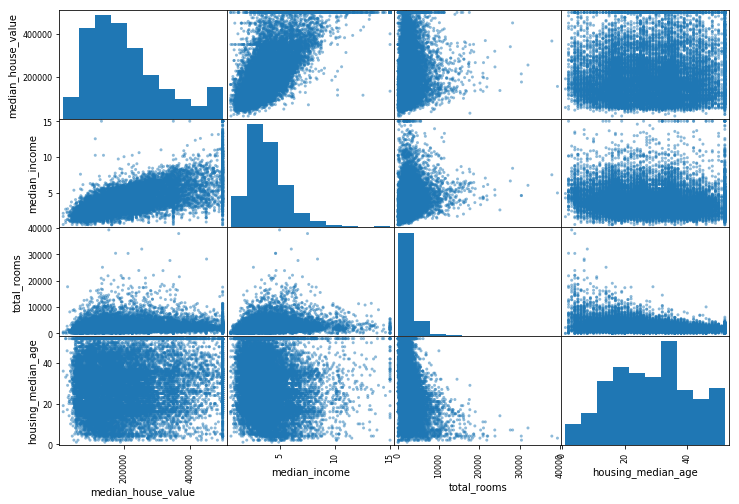

In [27]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]

scatter_matrix(housing[attributes], figsize=(12,8))

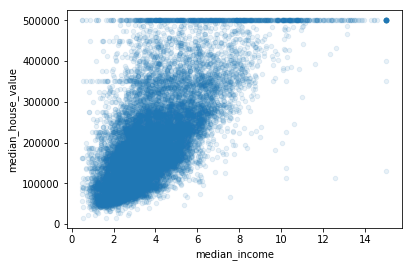

In [28]:
housing.plot(kind="scatter", x="median_income", y="median_house_value",
alpha=0.1)

In [29]:
#Creates
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]

In [30]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687160
income_cat                  0.642274
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64

# Prepare the Data  for Machine Learning Algorithms

In [31]:
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

In [32]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,income_cat
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,<1H OCEAN,2.0
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,<1H OCEAN,5.0
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,NEAR OCEAN,2.0
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,INLAND,2.0
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,<1H OCEAN,3.0


### Data Cleaning

In [33]:
housing.drop('total_bedrooms', axis=1)
housing.head()  #These methods don't affect the Data Frame housing. Only let us see the form it would obtain after its application 

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,income_cat
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,<1H OCEAN,2.0
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,<1H OCEAN,5.0
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,NEAR OCEAN,2.0
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,INLAND,2.0
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,<1H OCEAN,3.0


In [34]:
from sklearn.preprocessing import Imputer

imputer = Imputer(strategy="median") #Imputer object (Estimator) is gonna work with strategy:"median"

#Delete the non-numeric feature.
housing_num = housing.drop("ocean_proximity", axis=1) #Remove this non-numeric column in order to avoid conflicts with median calculation

In [35]:
#Does what Imputer.fit() does in the object "imputer". In this case, it computes the median of the DataFrame columns.
imputer.fit(housing_num)

#To see the values of the medians. And check with the traditional method.
print(imputer.statistics_) #This method allows to see storaged hyperpamethers (i.e, statistics)
print(housing_num.median().values)

[-118.51     34.26     29.     2119.5     433.     1164.      408.
    3.5409    3.    ]
[-118.51     34.26     29.     2119.5     433.     1164.      408.
    3.5409    3.    ]


In [36]:
#Creates a plain NumPy array with the train
X = imputer.transform(housing_num) 
housing_tr = pd.DataFrame(X, columns=housing_num.columns)

# -This function (imputer) works as an estimator. Fits the Dataset according to a hyperparamether (i.e, strategy)
# -Then I use this imputer to transform my Dataset (Fill nan values)

In [37]:
#Creates a plain NumPy array with the the train
X = imputer.transform(housing_num) 
housing_tr = pd.DataFrame(X, columns=housing_num.columns)

# -This function (imputer) works as an estimator. Fits the Dataset according to a hyperparamether (i.e, strategy)
# -Then I use this imputer to transform my Dataset (Fill nan values)

#This estimator could also work for predicting

### Handling Texts and Categorical Attributes

In [38]:
from sklearn.preprocessing import LabelEncoder #Method por passing categorical attributes in text values, to numbers

encoder = LabelEncoder() 
housing_cat = housing["ocean_proximity"] 
housing_cat_encoded = encoder.fit_transform(housing_cat)
housing_cat_encoded.shape

(16512,)

In [39]:
# the values in last array, are the transformation of different values that "ocean proximity" can take:("1H OCEAN", "ISLAND", etc...)
# into number values (0,1,2,3,4). This assignation is done sequentially

print(encoder.classes_)

['<1H OCEAN' 'INLAND' 'ISLAND' 'NEAR BAY' 'NEAR OCEAN']


In [56]:
# Performing OneHotEncoder Method. (Better assignation)

housing_cat_encoded
housing_cat_encoded_T=housing_cat_encoded.reshape(-1,1) #Traspose of housing_cat_encoded (for this case)

from sklearn.preprocessing import OneHotEncoder #Encoder to Binarize the "ocean_proximity" category. 
encoder=OneHotEncoder()
housing_cat_encoded_1hot=encoder.fit_transform(housing_cat_encoded_T)
housing_cat_encoded_1hot.shape
# Each row is one house (district)
# ex: [0,0,1,0,0]: 1 in third entry(index=2) means that the house belongs to category corresponding to 2. In this case 'ISLANDS' 


(16512, 5)

In [57]:
#That was one way. The recommended and, The only one that works... is the OneHotEnconder() provided by future_encoders.py file (library) 
# So let's use it!(As we had option...)
housing_cat = housing[['ocean_proximity']]
housing_cat.head(10)


from future_encoders import OneHotEncoder

cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot


<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [41]:
housing_cat_encoded_1hot.toarray() #Because the scikit method OneHotEncoder creates a Sparse Scipy Matrix instead of Numpy array

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [42]:
#You can do Both Procceses at Once!: LabelEncoder() and OneHotEncoder(). You do this by calling the Method LabelBinarizer() 

from sklearn.preprocessing import LabelBinarizer


encoder = LabelBinarizer()
housing_cat_1hot = encoder.fit_transform(housing_cat)
housing_cat_1hot

#You get a Numpy array using this method, instead of Sparce-matrix as before(using  both methods separately).

array([[1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       ...,
       [0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0]])

### Custom Transformers

In [43]:
#Define your own estimator. You will need set three methods: fit(), transform() and fit_transform() for this task.

from sklearn.base import BaseEstimator, TransformerMixin #You put BaseEstimator for tunning parameters through set_params() and get_params() 

rooms_ix, bedrooms_ix, population_ix, household_ix = 3, 4, 5, 6 #List the columns, i.e, population_ix is the 5th column

class CombinedAttributesAdder(BaseEstimator, TransformerMixin): #Defining this new estimator

    def __init__(self, add_bedrooms_per_room = True): # no *args or **kargs. 
        self.add_bedrooms_per_room = add_bedrooms_per_room  #The object gets the attribute "add_bedrooms_per_room" (True by default)

    def fit(self, X, y=None):
        return self # nothing else to do

    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, household_ix]
        population_per_household = X[:, 5] / X[:, 6] #Housing["population"]/Housing["household"]  
        
        
        if self.add_bedrooms_per_room: #(True in this case)
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix] #Creates this "array" if add_beedrooms_per_rom=True
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room] #Returns the transformed Matrix according to this estimator

        else:
            return np.c_[X, rooms_per_household, population_per_household] #np.c_: Column stack 

It's possible to get information about the Tunning parameters in your Own Estimator. 

See blog: http://danielhnyk.cz/creating-your-own-estimator-scikit-learn/ 

In [44]:
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False) #This is my new constructor. bedrooms_per_room category is NOT going to be added 

housing_extra_attribs = attr_adder.transform(housing.values) #Returns me the Data Frame Housing.values transform according to attr_adder

In [45]:
housing_extra_attribs

array([[-121.89, 37.29, 38.0, ..., 2.0, 4.625368731563422,
        2.094395280235988],
       [-121.93, 37.05, 14.0, ..., 5.0, 6.008849557522124,
        2.7079646017699117],
       [-117.2, 32.77, 31.0, ..., 2.0, 4.225108225108225,
        2.0259740259740258],
       ...,
       [-116.4, 34.09, 9.0, ..., 3.0, 6.34640522875817,
        2.742483660130719],
       [-118.01, 33.82, 31.0, ..., 3.0, 5.50561797752809,
        3.808988764044944],
       [-122.45, 37.77, 52.0, ..., 3.0, 4.843505477308295,
        1.9859154929577465]], dtype=object)

### Transformation Pipelines


In [46]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler #This is a method for stadardize your data NOT THE SAME with normalize it

num_pipeline = Pipeline([('imputer', Imputer(strategy="median")),
                         ('attribs_adder', CombinedAttributesAdder()),
                         ('std_scaler', StandardScaler()),
                        ]) #Here this creation of tuples (name,transform),()... Follows this instructions sequantially
                                                             #Note: All but last tuple must have a fit_transform() method defined
housing_num_tr = num_pipeline.fit_transform(housing_num) #Finally all three Estimators have been apllied to housing_num(housing without 'ocean_proximity' cattegory)
housing_num_tr


array([[-1.15604281,  0.77194962,  0.74333089, ..., -0.31205452,
        -0.08649871,  0.15531753],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.21768338,
        -0.03353391, -0.83628902],
       [ 1.18684903, -1.34218285,  0.18664186, ..., -0.46531516,
        -0.09240499,  0.4222004 ],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.3469342 ,
        -0.03055414, -0.52177644],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.02499488,
         0.06150916, -0.30340741],
       [-1.43579109,  0.99645926,  1.85670895, ..., -0.22852947,
        -0.09586294,  0.10180567]])

Class: FeatureUnion

In [47]:
from sklearn.base import BaseEstimator, TransformerMixin


class DataFrameSelector(BaseEstimator, TransformerMixin): #Newly, this function receive a 'kind_data'(attribute_names) and according to that, Returns, Frame with attribute_names desired values 
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values #Returns a DataFrame with attribute_names values (according with you want)

In [48]:
cat_attribs=["ocean_proximity"]
cat_attribs

['ocean_proximity']

In [49]:
num_attribs=list(housing_num)
num_attribs

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'income_cat']

In [50]:
# Here, we're gonna select between both categories, numerical and categorical. 
# Using attribute_names=num_attribs in one case or =cat_attribs in another case, pass it through DataFrameSelector
# Selects the data and then apllies a method according to its category: num or cat. 
# Put them into two methods. num_pipeline: works for numerical features. cat_pipeline: works with text features.
# Put the 2 method created in last step and create a chain with them, through function FeatureUnion

from sklearn.pipeline import FeatureUnion

num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

num_pipeline = Pipeline([
('selector', DataFrameSelector(num_attribs)),
('imputer', Imputer(strategy="median")),
('attribs_adder', CombinedAttributesAdder()),
('std_scaler', StandardScaler())])

cat_pipeline = Pipeline([
('selector', DataFrameSelector(cat_attribs)),
('label_binarizer', LabelBinarizer())]) #Here is the difference!! In code that works, this line is like:'cat_encoder', OneHotEncoder(sparse=False)
                                        #-so here is using LabelBinarizer() as Encoder and in the working case it's used OneHotEncoder() from future_encoder.py file (I'm pretty sure)

full_pipeline = FeatureUnion(transformer_list=[("num_pipeline", num_pipeline),("cat_pipeline", cat_pipeline)])


And you can run the whole pipeline simply:

In [51]:
housing_prepared = full_pipeline.fit_transform(housing)

TypeError: fit_transform() takes 2 positional arguments but 3 were given

#### Lets try another Method. See https://github.com/ageron/handson-ml/blob/master/02_end_to_end_machine_learning_project.ipynb

In [53]:
from future_encoders import ColumnTransformer #future_encoders.py must be located in same directory, I mean... this

In [59]:
num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),  #Here OneHotEncoder() Is which comes from future_encoders.py library. The one comming from Scikit library don't work
    ])

housing_prepared = full_pipeline.fit_transform(housing)


In [62]:
print(housing_prepared.shape)
housing_prepared

(16512, 17)


array([[-1.15604281,  0.77194962,  0.74333089, ...,  0.        ,
         0.        ,  0.        ],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.18684903, -1.34218285,  0.18664186, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.        ,
         0.        ,  0.        ],
       [-1.43579109,  0.99645926,  1.85670895, ...,  0.        ,
         1.        ,  0.        ]])

#### Well,  Gettin Back to DataFrameSelector method...

In [63]:
# Create a class to select numerical or categorical columns 
class OldDataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

#Checked ()

In [64]:
num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

old_num_pipeline = Pipeline([
        ('selector', OldDataFrameSelector(num_attribs)),
        ('imputer', Imputer(strategy="median")),
        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])

old_cat_pipeline = Pipeline([
        ('selector', OldDataFrameSelector(cat_attribs)),
        ('cat_encoder', OneHotEncoder(sparse=False)),
    ])

In [65]:
from sklearn.pipeline import FeatureUnion

old_full_pipeline = FeatureUnion(transformer_list=[
        ("num_pipeline", old_num_pipeline),
        ("cat_pipeline", old_cat_pipeline),
    ])

In [66]:
old_housing_prepared = old_full_pipeline.fit_transform(housing)
old_housing_prepared


array([[-1.15604281,  0.77194962,  0.74333089, ...,  0.        ,
         0.        ,  0.        ],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.18684903, -1.34218285,  0.18664186, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.        ,
         0.        ,  0.        ],
       [-1.43579109,  0.99645926,  1.85670895, ...,  0.        ,
         1.        ,  0.        ]])

In [67]:
# Comparing Both DataFrameSelectors

np.allclose(housing_prepared, old_housing_prepared)

#They are equal (True) so you could use whatever you prefer

True

## Select and Train a Model

So we have the DataFrame prepared for train our ML algorithm. 

 ### Training and Evaluating on the Training Set

In [68]:
#Linear Regression fit
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels) #(Prepared Data, Objetives)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [78]:
#Well, now I have a regression model, fitted according experimental results (housing_labels)
#-Then you make a probe of this infeering model in your pipeline preprocessed Data ...

# "let's try the full preprocessing pipeline on a few training instances"

some_data = housing.iloc[:5]          #Data until 5 column
some_labels = housing_labels.iloc[:5] #Labels """"""
some_data_prepared = full_pipeline.transform(some_data) #Prepared through our Pipeline preprocessing Method 

print("Predictions:", lin_reg.predict(some_data_prepared)) #Predictions through linear regression model.
print("\n According to the some_data_prepared Matrix: (5 data sets, 5 predictions)")
some_data_prepared


Predictions: [203682.37379543 326371.39370781 204218.64588245  58685.4770482
 194213.06443039]

 According to the some_data_prepared Matrix: (5 data sets, 5 predictions)


array([[-1.15604281,  0.77194962,  0.74333089, -0.49323393, -0.44543821,
        -0.63621141, -0.42069842, -0.61493744, -0.95445595, -0.31205452,
        -0.08649871,  0.15531753,  1.        ,  0.        ,  0.        ,
         0.        ,  0.        ],
       [-1.17602483,  0.6596948 , -1.1653172 , -0.90896655, -1.0369278 ,
        -0.99833135, -1.02222705,  1.33645936,  1.89030518,  0.21768338,
        -0.03353391, -0.83628902,  1.        ,  0.        ,  0.        ,
         0.        ,  0.        ],
       [ 1.18684903, -1.34218285,  0.18664186, -0.31365989, -0.15334458,
        -0.43363936, -0.0933178 , -0.5320456 , -0.95445595, -0.46531516,
        -0.09240499,  0.4222004 ,  0.        ,  0.        ,  0.        ,
         0.        ,  1.        ],
       [-0.01706767,  0.31357576, -0.29052016, -0.36276217, -0.39675594,
         0.03604096, -0.38343559, -1.04556555, -0.95445595, -0.07966124,
         0.08973561, -0.19645314,  0.        ,  1.        ,  0.        ,
         0.        

In [70]:
print("Labels:", list(some_labels)) #These are the Experimental Results."Truth" Values.

Labels: [286600.0, 340600.0, 196900.0, 46300.0, 254500.0]


In [79]:
#Checking the error of the Model:

from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68376.64295459937

In [80]:
#That was bad. Is a little big that error: 
#Let's see How about its Mean square error:

from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(housing_labels, housing_predictions)
lin_mae


49508.082059709115

Definetively that Method is NOT good enough. Maybe cause the Prepared Data or maybe for the Regression Method. 

#### So let's probe the Decision Tree Regression Method 

In [81]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42) #Regression Method
tree_reg.fit(housing_prepared, housing_labels)  #And this time using again the housing_prepared Dataset.

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=42, splitter='best')

In [83]:
housing_predictions = tree_reg.predict(housing_prepared) #House predictions according to tree regression method fitted to housing_prepared data
tree_mse = mean_squared_error(housing_labels, housing_predictions) #Calculating again the error of the method.
tree_rmse = np.sqrt(tree_mse)
tree_rmse

#And the error is...

0.0

In [84]:
housing_predictions

array([286600., 340600., 196900., ...,  97800., 225900., 500001.])

In [86]:
housing_labels.values

array([286600., 340600., 196900., ...,  97800., 225900., 500001.])

Well It's seems the Error is really equal to 0 (And using all housing_prepared DataSet, Not only 5 values). 
###### This Tree Regression Method is kindly good!

